In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [73]:
data = {
    "img_class": [],
    "img_width": [],
    "img_height": [],
    "bb_x_top_left":[], 
    "bb_y_top_left": [],
    "bb_width": [], 
    "bb_height": []
}

with open('sample_coco.txt', 'r') as reader:
    for line in reader:
        line_list = line.strip().split(",")
        
        data["img_class"].append(int(line_list[0].split(":")[-1].strip()))
        data["img_width"].append(int(line_list[2].split(":")[-1].strip()))
        data["img_height"].append(int(line_list[1].split(":")[-1].strip()))
        data["bb_x_top_left"].append(int(line_list[3].split(":")[-1][1:].strip()))
        data["bb_y_top_left"].append(int(line_list[4].strip()))
        data["bb_width"].append(int(line_list[5].strip()))
        data["bb_height"].append(int(line_list[6].strip()[:-1]))

In [74]:
df = pd.DataFrame(data)
df.head()

,img_class,img_width,img_height,bb_x_top_left,bb_y_top_left,bb_width,bb_height
0,0,1093,330,69,464,312,175
1,1,439,782,359,292,83,199
2,3,831,645,297,312,267,167
3,34,608,943,275,112,319,290
4,20,857,593,71,368,146,147


## Output Class Distribution

Text(0.5, 1.0, 'Distribution of Classes')

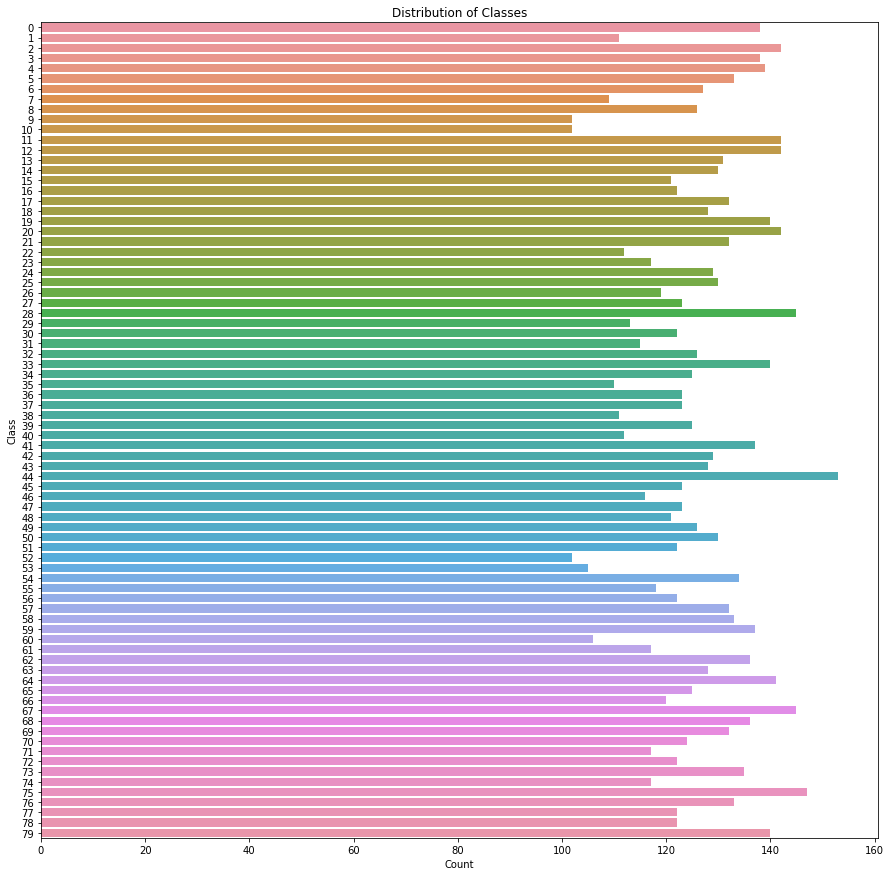

In [77]:
plt.figure(figsize = (15, 15))
sns.countplot(y=df['img_class'])
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Distribution of Classes")

## Anchor Box Calculation

In [190]:
def get_anchor_boxes(df, clusters):
    bb_width_normalized = np.array(df["bb_width"]) #/df["img_width"])
    bb_height_normalized = np.array(df["bb_height"]) #/df["img_height"])
    bb_dimensions_normalized = np.vstack((bb_width_normalized, bb_height_normalized)).T
    
    kmeans = KMeans(n_clusters=clusters, random_state=2021).fit(bb_dimensions_normalized)
    
    cluster_classes = kmeans.predict(bb_dimensions_normalized)
    
    plt.figure(figsize = (15, 8))
    sns.scatterplot(x=bb_width_normalized, y = bb_height_normalized, hue=cluster_classes)
    plt.xlabel("Normalized Width")
    plt.ylabel("Normalzied Height")
    plt.title(f"K-Means Clustering with {cluster} Clusters")
    
    return kmeans.cluster_centers_


Cluster centers for 3 clusters are:
	width=213, height=112, aspect_ratio=1.91
	width=319, height=284, aspect_ratio=1.13
	width=123, height=292, aspect_ratio=0.42

Cluster centers for 4 clusters are:
	width=308, height=132, aspect_ratio=2.34
	width=312, height=312, aspect_ratio=1.0
	width=128, height=311, aspect_ratio=0.41
	width=128, height=130, aspect_ratio=0.99

Cluster centers for 5 clusters are:
	width=320, height=119, aspect_ratio=2.68
	width=118, height=320, aspect_ratio=0.37
	width=322, height=322, aspect_ratio=1.0
	width=119, height=119, aspect_ratio=1.0
	width=222, height=221, aspect_ratio=1.01

Cluster centers for 6 clusters are:
	width=97, height=225, aspect_ratio=0.43
	width=139, height=345, aspect_ratio=0.4
	width=240, height=218, aspect_ratio=1.1
	width=135, height=97, aspect_ratio=1.4
	width=328, height=322, aspect_ratio=1.02
	width=326, height=118, aspect_ratio=2.77


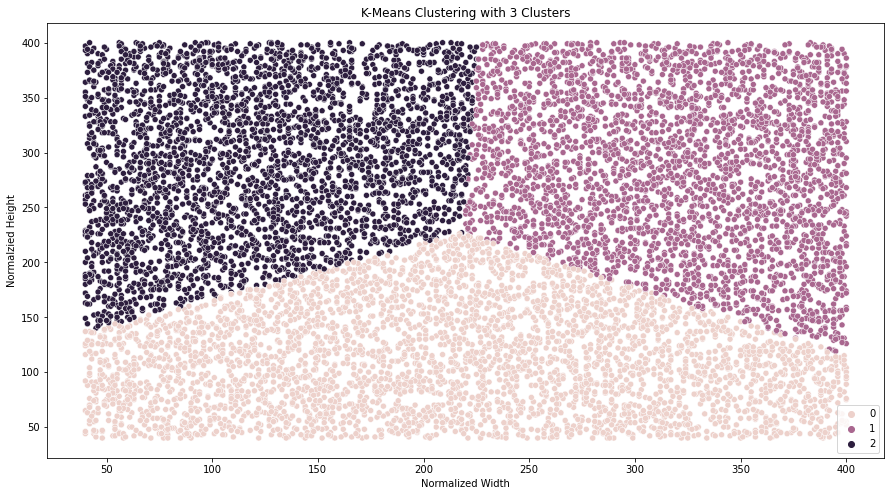

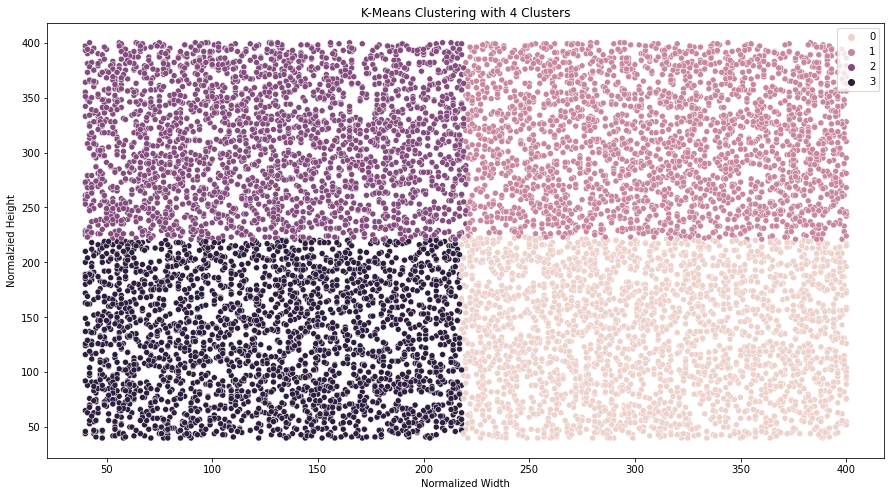

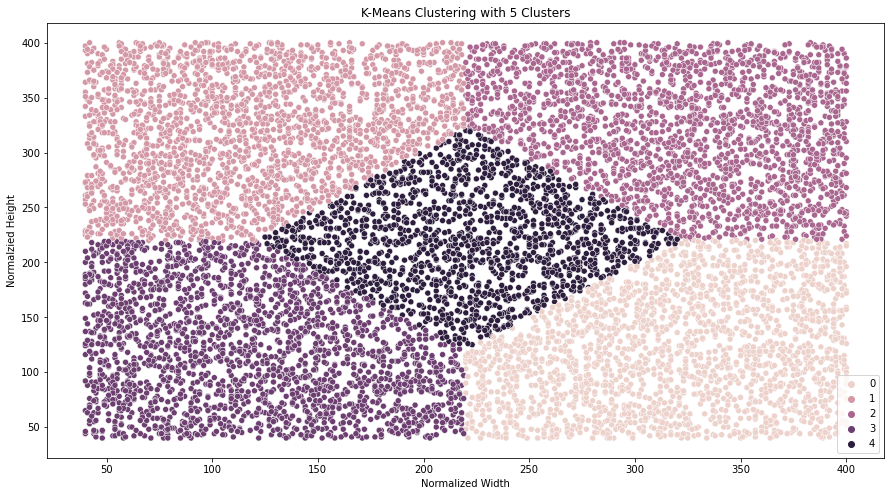

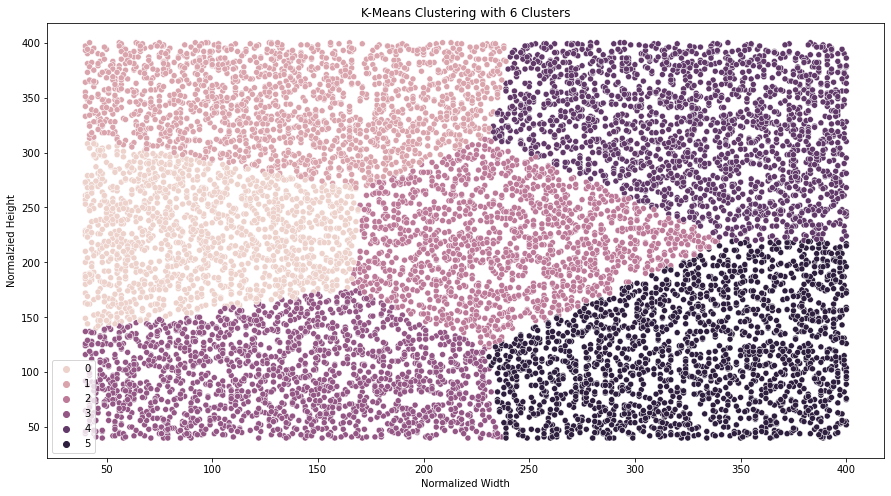

In [201]:
for cluster in range(3, 7):
    cluster_centers = get_anchor_boxes(df, clusters=cluster).tolist()
    print(f"\nCluster centers for {cluster} clusters are:")
    for i in cluster_centers:
        print(f"\twidth={round(i[0])}, height={round(i[1])}, aspect_ratio={round(i[0]/i[1], 2)}")    